In [ ]:
#샘플의 표준편차를 구할 것이다.
#표준편차를 구하는 샘플들은 서로 서로 상관관계가 없어야 하기 때문에,
#상관시간을 보고, 서로 상관관계가 없어지는 간격으로 기존 샘플에서 또 뽑아서 표준편차를 구할 것이다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 표본 만드는 함수 (생략) (이전 파일에 설명이 있다.)

In [ ]:
def local(L,num):

  right = num+1
  if right % L == 0:
    right -= L

  left = num-1
  if (left+1) % L == 0:
    left += L

  up = num - L
  if up < 0:
    up += L*L

  down = num + L
  if down >= L*L:
    down -= L*L

  return np.array([right,up,left,down])

def local_E(arr, num):
  L=int(np.sqrt(len(arr)))
  return -np.sum(arr[local(L,num)])*arr[num]

def total_energy(S): # 이 함수는 "첫 시행에서만 사용"하는 것으로 변경 (전체를 계산)
  L=int(np.sqrt(len(S)))
  E=0
  for num in range(len(S)):
    E += (local_E(S, num))
  return E/2

def delta_E(arr, number): # 바뀐 에너지와의 차잇값만 계산. 이 함수를 두번째 시행 이후부터 사용, arr은 이전 행렬(mu)
  L=int(np.sqrt(len(arr)))
  return 2*(arr[number]) * np.sum(arr[local(L,number)])

In [ ]:
def spin_E_change(beta,L, t=1000):
  # t=1000 ##반복횟수
  # beta=0 ##
  # L=5 ##
  delta_m4 = np.exp(beta*(-4)) # 미리계산
  delta_m8 = np.exp(beta*(-8)) # 미리계산


  random_arr = np.random.randn(L*L)
  S = random_arr/abs(random_arr)
#  print(S)

  E_S = total_energy(S)
  m = np.sum(S)/len(S)

  E_list=[E_S]
  m_list=[m]
  S_list=[S]

#  print('first E:',E_S,', first m:',m)

  for t in range(t):
      # random number, 새로운 U생성
      U = S.copy()
      number = np.random.choice(len(S))
      U[number] *= -1
  #    print(number,'번째 flip')

      # delta
      delta = delta_E(S, number) # delta == (-E_S+E_U)
      E_U = E_S + delta
  #    print('delta=',delta, end=', ')

      # accept 확률
      if delta <= 0:
        accept_S_to_U = 1
      else:
        if delta == 4:
          accept_S_to_U = delta_m4
        elif delta == 8:
          accept_S_to_U = delta_m8
        else:
          print('error, delta=',delta)

      # accept, 그다음 S 확정, 측정
      if np.random.random() < accept_S_to_U:
        S = U.copy()
        E_S = E_U.copy()
      m = np.sum(S)/len(S)

      # if t%100 ==0: # 반복횟수가 너무 길어서 조금만 출력
      #   print('t=',t)
      #   print('now E:',E_S,', m:',m)

      E_list.append(E_S)
      m_list.append(m)
      S_list.append(S)

  return E_list, m_list, S_list

## beta=0.6일때의 경우

In [ ]:
#표본 만들기
beta=0.6
L=5
t=5000

E_list, m_list, S_list = spin_E_change(beta,L, t)

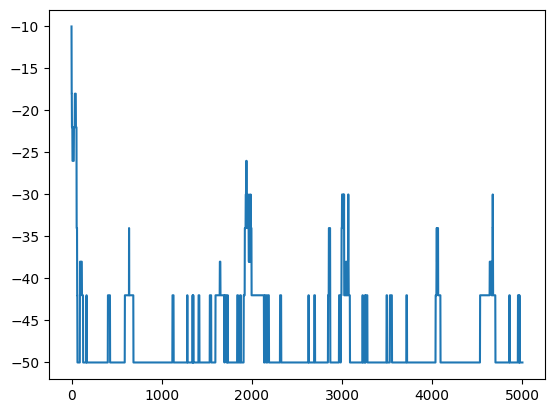

In [ ]:
plt.plot(E_list)

In [ ]:
#500번째 부터 표본을 사용하겠다.(초기값의 영향을 받지 않는 구간부터 사용하기 위해서이다.)

In [ ]:
from pandas import Series

In [ ]:
#사용 할 표본: E_list
x_list = E_list[500:]

S = Series(x_list)

s_list=[]
for i in range(500):
  s_list.append(S.autocorr(i))

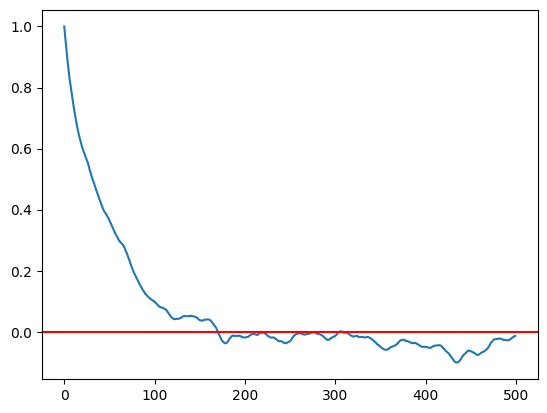

In [ ]:
plt.plot(s_list)

plt.axhline(0.0, color='red')

#상관관계가 0으로 내려가는 지점을 확인 할 수 있다.(약 180)
#즉, 180보다 큰 간격으로 뽑아서 쓰면 서로 독립된 변수들로 이루어진 샘플을 만들 수 있다.

In [ ]:
for i in range(len(s_list)):
  if s_list[i] < 0.1: #i번째는 0.1보다 작은 상관계수여야 한다.
    tau = i*5
    break

In [ ]:
sample = E_list[500:][::tau]
print(sample)

[-50.0, -50.0, -50.0, -42.0, -50.0, -30.0, -50.0, -50.0, -50.0, -50.0]


In [ ]:
s_std = np.std(sample)
s_stderror = s_std/np.sqrt(len(sample)-1)
print(s_stderror)

2.0698899595013365


## 반복

In [ ]:
#beta = 0.01 ~ 1.00

E_m_list, m_m_list = [],[]
E_lists=[]##표본 저장

L=5
t=10500
for i in range(1,101):
  beta = i*0.01

  E_list, m_list, S_list = spin_E_change(beta, L, t)

  E_mean = np.sum(E_list[500:])/(t-500)
  m_mean = np.sum(m_list[500:])/(t-500)

  E_m_list.append(E_mean)
  m_m_list.append(m_mean)
  E_lists.append(E_list[500:]) #500부터~로 잘라서 저장

Text(0, 0.5, 'E_mean')

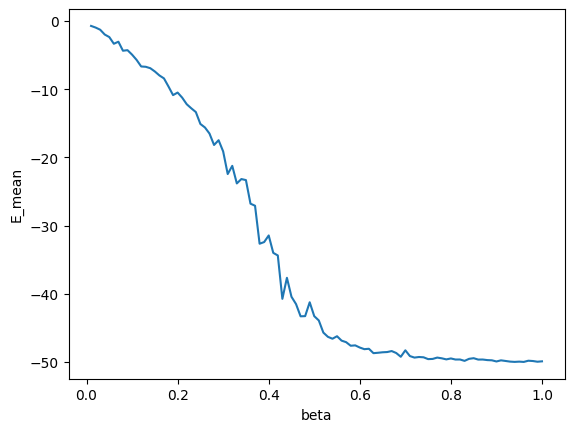

In [ ]:
#에너지 beta 0.1~1.0
plt.plot(np.arange(1,101)*0.01, E_m_list)

plt.xlabel('beta')
plt.ylabel('E_mean')

In [ ]:
std_list=[]
for E_list in E_lists[9::10]:
    x_list = E_list[500:]
    S = Series(x_list)
    s_list=[]
    for i in range(500):
      s_list.append(S.autocorr(i))

    for i in range(len(s_list)):
      if s_list[i] < 0.1:
        tau = i*5 #i번째에 0.1보다 작은 상관계수
        break
      if i == len(s_list)-1:
        print('error 0.1보다 작은 상관계수가 없음')

    print(tau)
    sample = E_list[500:][::tau]
    s_std = np.std(sample)
    s_stderror = s_std/np.sqrt(len(sample)-1)
    print(s_stderror)

    std_list.append(s_stderror)

95
0.7026997108572474
155
0.8965531268443397
740
3.152907927987569
1285
4.765950662174936
455
1.6307698889907802
440
1.1080898185818981
605
0.6831300510639733
210
0.17391304347826084
110
0.09195402298850572
195
0.163265306122449


<ErrorbarContainer object of 3 artists>

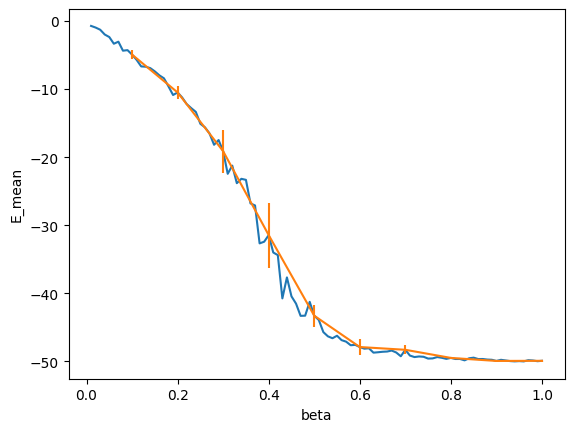

In [ ]:
plt.plot(np.arange(1,101)*0.01, E_m_list)

plt.xlabel('beta')
plt.ylabel('E_mean')

plt.errorbar((np.arange(1,101)*0.01)[9::10], E_m_list[9::10], std_list)